In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
# machine learning
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets, models

import progressbar

In [26]:
# implemented classes
from BasicClassifier import BasicClassifier
from DataAugment import DataAug
from Metrics import Metrics

In [27]:
daug = DataAug()

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [29]:
widgets = [
    ' [', progressbar.Timer(), '] ',
    progressbar.Percentage(), ' ',
    progressbar.Bar(),
    ' (', progressbar.ETA(), ') ',
]

In [30]:
# import mnist dataset
dataset = "MNIST"
BATCH_SIZE = 500
num_classes = 10

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data',
                               train=True,
                               download=True,
                               transform=torchvision.transforms.ToTensor()),
    batch_size=BATCH_SIZE,shuffle=True)

Text(0.5, 1.0, 'Proportion of Relevant Pixels')

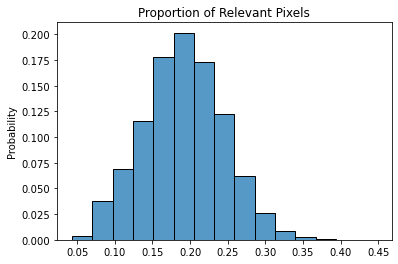

In [31]:
relevant_density_array = [] 
for (inputs, labels) in train_loader:
    relevant_density_array = np.concatenate((relevant_density_array,(inputs > 0).sum(2).sum(2).reshape(-1)/(inputs.shape[2]*inputs.shape[3])))
sns.histplot(relevant_density_array,bins=15,stat='probability')
plt.title("Proportion of Relevant Pixels")

In [32]:
(inputs,labels) = next(iter(train_loader))

In [33]:
func_dict = {}
for d in dir(daug):
    if d[0] != '_' and d != 'func_divider':
        func_dict[d] = getattr(daug,d)

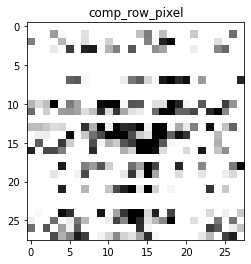

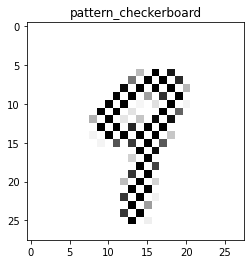

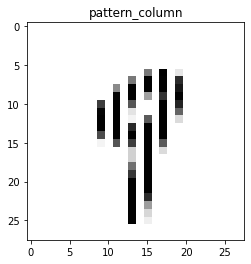

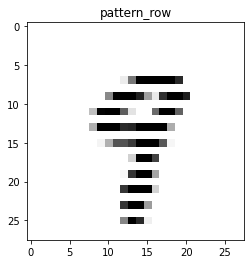

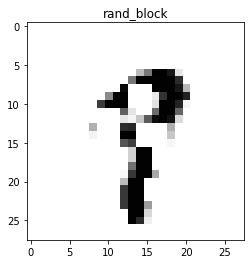

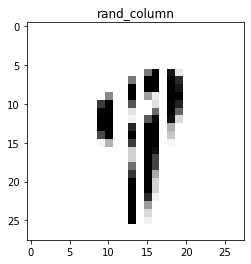

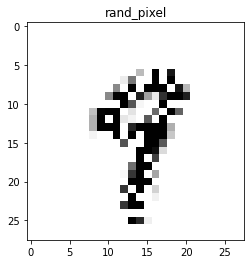

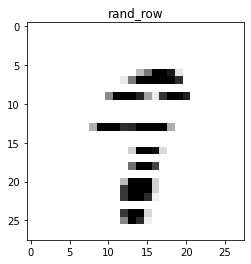

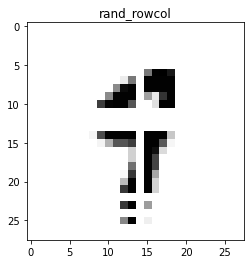

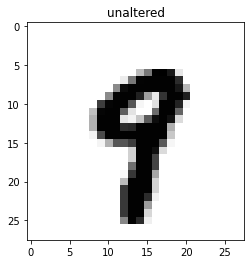

In [34]:
for f in func_dict:    
    plt.imshow(func_dict[f](inputs,0.4,False)[0,0],cmap="Greys")
    plt.title(f)
    plt.show()

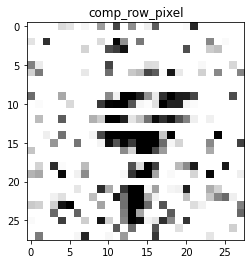

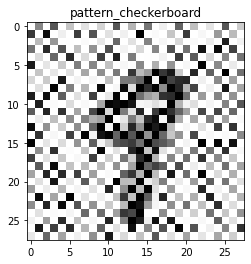

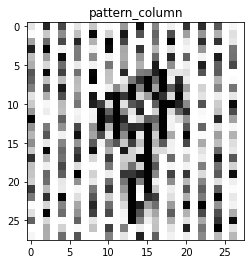

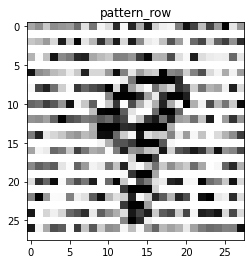

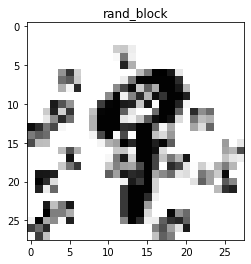

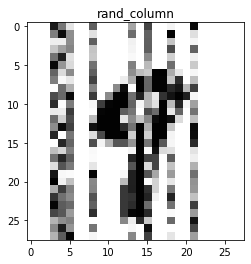

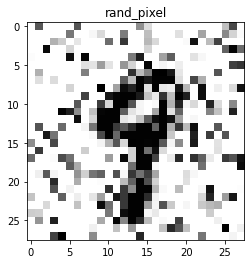

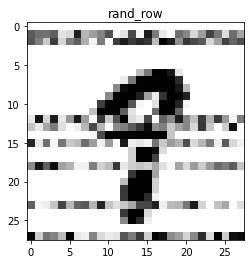

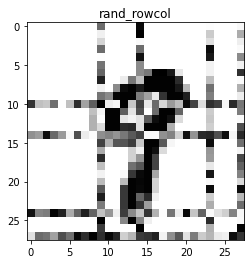

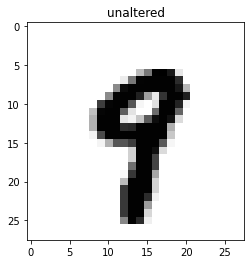

In [37]:
for f in func_dict:    
    plt.imshow(func_dict[f](inputs,0.3,True)[0,0],cmap="Greys")
    plt.title(f)
    plt.show()